In [1]:
import pandas as pd
import glob

In [2]:
def open_eq_file(filename):
    df = pd.read_csv(filename, header=None, names=[
        'No.',
        'Orgin date',
        'Longitude(E)',
        'Latitude(N)',
        'Magnitude',
        'Depth',
        'Location',
        'Location_details_1',
        'Location_details_2',
    ])
    # Delete the first row (column name)
    df = df.drop(index=0).reset_index(drop=True)
    return df

In [3]:
# Path ke folder yang berisi file-file CSV
folder_path = 'data/'

# Mengambil semua file CSV di folder tertentu
file_list = glob.glob(folder_path + '*.csv')
print(file_list)


# Membuat list kosong untuk menyimpan DataFrame dari setiap file
dfs = []

# Membaca setiap file CSV dan menyimpan DataFrame-nya ke dalam list dfs
for filename in file_list:
    dfs.append(open_eq_file(filename))

# Menggabungkan semua DataFrame dalam list dfs menjadi satu DataFrame
combined_df = pd.concat(dfs)

# Menampilkan hasil gabungan
# print(combined_df)

['data\\Seismic activity_638531926186258222.csv', 'data\\Seismic activity_638531926338922859.csv', 'data\\Seismic activity_638531926495148066.csv', 'data\\Seismic activity_638531926677271123.csv', 'data\\Seismic activity_638531926731024863.csv']


In [4]:
# Convert the 'Origin date' column to datetime format
combined_df = combined_df.rename(columns={'Orgin date': 'Origin date'})
combined_df['Origin date'] = pd.to_datetime(combined_df['Origin date'])
combined_df['Magnitude'] = pd.to_numeric(combined_df['Magnitude'])
combined_df['Date'] = pd.to_datetime(combined_df['Origin date'].dt.date)
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.month

combined_df

,No.,Origin date,Longitude(E),Latitude(N),Magnitude,Depth,Location,Location_details_1,Location_details_2,Date,Year,Month
0,Small area,2024-06-05 13:50:25,122.002,24.5255,3.5,13.8,24.53N 122.00E,i.e. 33.2 km SE of Yilan County(24.53N 122.00E,i.e. 33.2 km SE of Yilan County),2024-06-05,2024,6
1,Small area,2024-06-05 04:42:21,121.829,24.1497,3.5,21.7,24.15N 121.83E,i.e. 27.6 km NE of Hualien County(24.15N 121.83E,i.e. 27.6 km NE of Hualien County),2024-06-05,2024,6
2,Small area,2024-06-04 19:45:18,121.709,24.3083,3.0,16.6,24.31N 121.71E,i.e. 36.3 km NNE of Hualien County(24.31N 121...,i.e. 36.3 km NNE of Hualien County),2024-06-04,2024,6
3,Small area,2024-06-03 23:04:40,120.297,23.0413,3.3,13.9,23.04N 120.30E,i.e. 12.7 km ENE of Tainan City(23.04N 120.30E,i.e. 12.7 km ENE of Tainan City),2024-06-03,2024,6
4,Small area,2024-06-03 23:01:10,121.605,23.9007,3.6,28.6,23.90N 121.61E,i.e. 10.1 km S of Hualien County(23.90N 121.61E,i.e. 10.1 km S of Hualien County),2024-06-03,2024,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1396,018,2024-04-03 03:26:32,120.211,23.3638,4.9,10.6,23.36N 120.21E,i.e. 13.5 km SW of Chiayi County(23.36N 120.21E,i.e. 13.5 km SW of Chiayi County),2024-04-03,2024,4
1397,Small area,2024-04-01 15:01:05,120.207,23.3612,3.2,9.8,23.36N 120.21E,i.e. 14.0 km SW of Chiayi County(23.36N 120.21E,i.e. 14.0 km SW of Chiayi County),2024-04-01,2024,4
1398,Small area,2024-04-01 14:57:43,120.212,23.358,3.1,9.3,23.36N 120.21E,i.e. 13.9 km SW of Chiayi County(23.36N 120.21E,i.e. 13.9 km SW of Chiayi County),2024-04-01,2024,4
1399,Small area,2024-04-01 14:54:23,120.211,23.3655,3.1,10.7,23.37N 120.21E,i.e. 13.3 km SW of Chiayi County(23.37N 120.21E,i.e. 13.3 km SW of Chiayi County),2024-04-01,2024,4


In [5]:
combined_df.sort_values(by=['Origin date'])

,No.,Origin date,Longitude(E),Latitude(N),Magnitude,Depth,Location,Location_details_1,Location_details_2,Date,Year,Month
26,Small area,2024-01-02 23:05:58,121.571,23.2363,4.4,39.9,23.24N 121.57E,i.e. 68.5 km NE of Taitung County(23.24N 121.57E,i.e. 68.5 km NE of Taitung County),2024-01-02,2024,1
25,Small area,2024-01-03 09:43:33,121.515,23.62,4.5,23.1,23.62N 121.51E,i.e. 42.5 km SSW of Hualien County(23.62N 121...,i.e. 42.5 km SSW of Hualien County),2024-01-03,2024,1
24,Small area,2024-01-05 12:13:38,121.858,24.4247,3.8,16.3,24.42N 121.86E,i.e. 35.3 km SSE of Yilan County(24.42N 121.86E,i.e. 35.3 km SSE of Yilan County),2024-01-05,2024,1
23,Small area,2024-01-06 00:58:07,122.861,24.6435,5.4,85.8,24.64N 122.86E,i.e. 111.5 km E of Yilan County(24.64N 122.86E,i.e. 111.5 km E of Yilan County),2024-01-06,2024,1
22,Small area,2024-01-06 10:22:21,121.949,23.9472,4.1,39.4,23.95N 121.95E,i.e. 33.8 km E of Hualien County(23.95N 121.95E,i.e. 33.8 km E of Hualien County),2024-01-06,2024,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,Small area,2024-06-03 23:01:10,121.605,23.9007,3.6,28.6,23.90N 121.61E,i.e. 10.1 km S of Hualien County(23.90N 121.61E,i.e. 10.1 km S of Hualien County),2024-06-03,2024,6
3,Small area,2024-06-03 23:04:40,120.297,23.0413,3.3,13.9,23.04N 120.30E,i.e. 12.7 km ENE of Tainan City(23.04N 120.30E,i.e. 12.7 km ENE of Tainan City),2024-06-03,2024,6
2,Small area,2024-06-04 19:45:18,121.709,24.3083,3.0,16.6,24.31N 121.71E,i.e. 36.3 km NNE of Hualien County(24.31N 121...,i.e. 36.3 km NNE of Hualien County),2024-06-04,2024,6
1,Small area,2024-06-05 04:42:21,121.829,24.1497,3.5,21.7,24.15N 121.83E,i.e. 27.6 km NE of Hualien County(24.15N 121.83E,i.e. 27.6 km NE of Hualien County),2024-06-05,2024,6


In [6]:
import datetime
start_year = 2024
start_month = 4
start_day = 26

end_year = 2024
end_month = 5
end_day = 26

start_date = datetime.datetime(start_year, start_month, start_day)
end_date = datetime.datetime(end_year, end_month, end_day)

In [7]:
combined_df[(combined_df['Date']>=start_date) & (combined_df['Date']<=end_date)] 

,No.,Origin date,Longitude(E),Latitude(N),Magnitude,Depth,Location,Location_details_1,Location_details_2,Date,Year,Month
0,364,2024-04-30 21:58:03,121.578,23.7377,4.2,5,23.74N 121.58E,i.e. 28.4 km S of Hualien County(23.74N 121.58E,i.e. 28.4 km S of Hualien County),2024-04-30,2024,4
1,363,2024-04-30 17:35:30,121.262,23.8023,4.4,7.5,23.80N 121.26E,i.e. 42.0 km WSW of Hualien County(23.80N 121...,i.e. 42.0 km WSW of Hualien County),2024-04-30,2024,4
2,Small area,2024-04-30 17:18:15,121.293,23.6513,3.5,5,23.65N 121.29E,i.e. 50.2 km SW of Hualien County(23.65N 121.29E,i.e. 50.2 km SW of Hualien County),2024-04-30,2024,4
3,Small area,2024-04-30 16:30:06,121.593,23.7738,3.8,7.2,23.77N 121.59E,i.e. 24.2 km S of Hualien County(23.77N 121.59E,i.e. 24.2 km S of Hualien County),2024-04-30,2024,4
4,Small area,2024-04-30 12:07:49,121.651,24.1825,4.2,35.4,24.18N 121.65E,i.e. 21.4 km N of Hualien County(24.18N 121.65E,i.e. 21.4 km N of Hualien County),2024-04-30,2024,4
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Small area,2024-04-26 05:24:38,121.575,23.831,3.6,5.9,23.83N 121.57E,i.e. 18.3 km SSW of Hualien County(23.83N 121...,i.e. 18.3 km SSW of Hualien County),2024-04-26,2024,4
63,Small area,2024-04-26 03:52:00,121.611,23.7142,3.7,7.2,23.71N 121.61E,i.e. 30.7 km S of Hualien County(23.71N 121.61E,i.e. 30.7 km S of Hualien County),2024-04-26,2024,4
64,Small area,2024-04-26 00:42:53,121.796,24.1953,3.5,7,24.20N 121.80E,i.e. 28.9 km NE of Hualien County(24.20N 121.80E,i.e. 28.9 km NE of Hualien County),2024-04-26,2024,4
65,347,2024-04-26 00:20:41,121.632,24.1848,4.2,23,24.18N 121.63E,i.e. 21.5 km N of Hualien County(24.18N 121.63E,i.e. 21.5 km N of Hualien County),2024-04-26,2024,4


## Dot plot

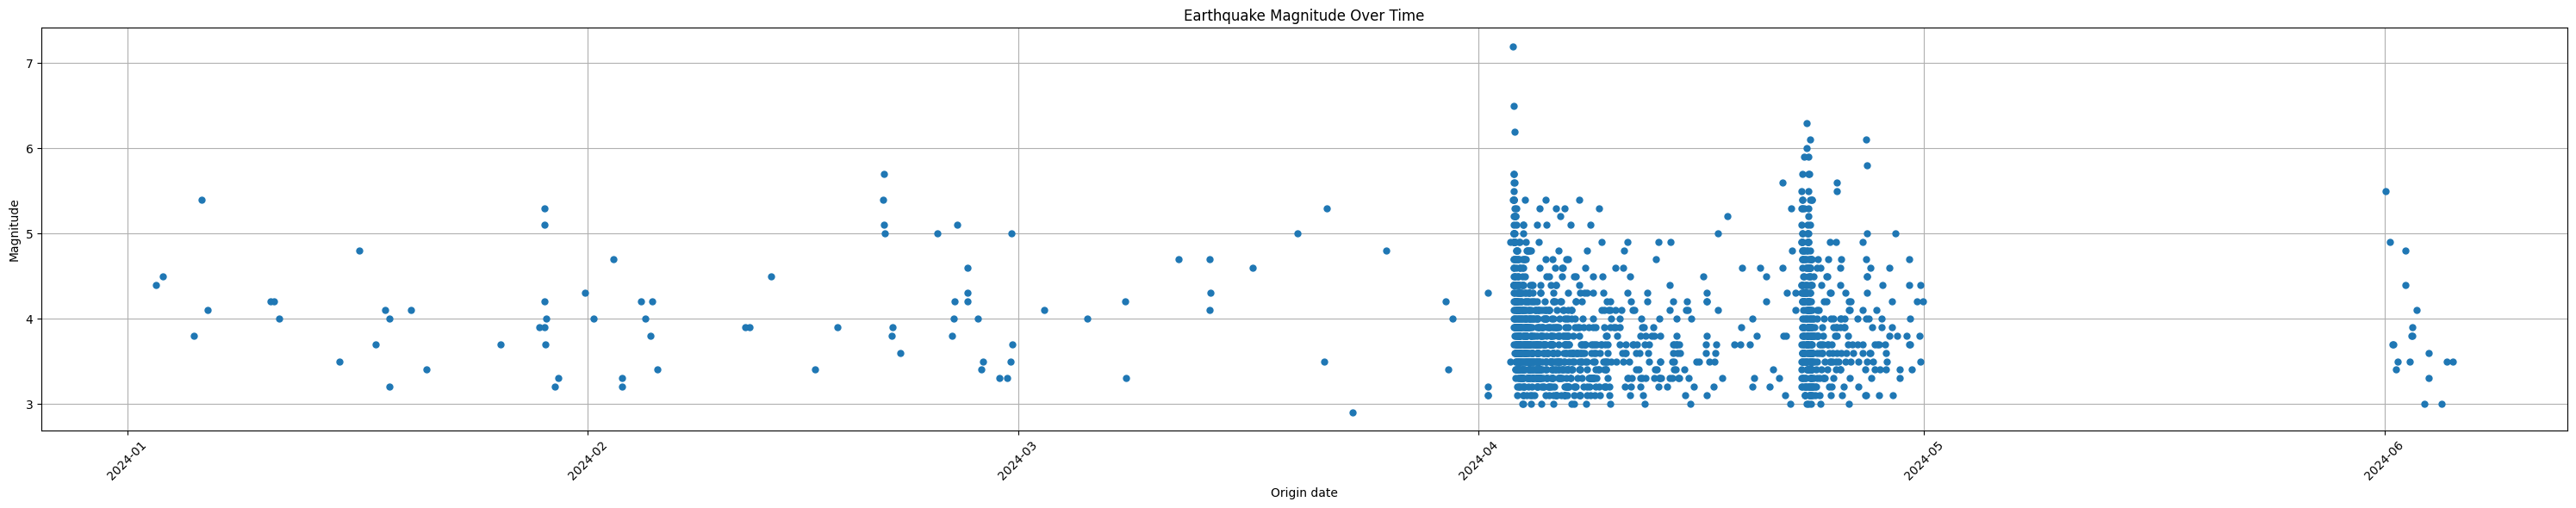

In [8]:
import matplotlib.pyplot as plt

# Convert the 'Origin date' column to datetime format
combined_df['Origin date'] = pd.to_datetime(combined_df['Origin date'])
combined_df['Magnitude'] = pd.to_numeric(combined_df['Magnitude'])

# Plotting using Matplotlib
plt.figure(figsize=(30, 6))
plt.plot(combined_df['Origin date'], combined_df['Magnitude'], 'o', markersize=5)
plt.title('Earthquake Magnitude Over Time')
plt.xlabel('Origin date')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from matplotlib.figure import Figure

fig = Figure(figsize=(15, 6))
ax = fig.subplots()
ax.plot(combined_df['Origin date'], combined_df['Magnitude'], 'o', markersize=5)
ax.set_title('Earthquake Magnitude Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Magnitude')
fig.savefig('eq.png')

## Max magnitude per day

In [36]:
# Group the data by date and find the maximum magnitude for each date
max_magnitude_per_day = combined_df.groupby('Date')['Magnitude'].max()

# Print the date and the highest magnitude for each day
max_magnitude_per_day = pd.DataFrame(max_magnitude_per_day)
max_magnitude_per_day

,Magnitude
Date,
2024-01-02,4.4
2024-01-03,4.5
2024-01-05,3.8
2024-01-06,5.4
2024-01-10,4.2
...,...
2024-06-01,5.5
2024-06-02,4.8
2024-06-03,4.1


In [38]:
full_date_range = pd.date_range(start=max_magnitude_per_day.index.min(), end=max_magnitude_per_day.index.max())

In [41]:
max_magnitude_per_day = max_magnitude_per_day.reindex(full_date_range)
max_magnitude_per_day

,Magnitude
2024-01-02,4.4
2024-01-03,4.5
2024-01-04,0.0
2024-01-05,3.8
2024-01-06,5.4
...,...
2024-06-01,5.5
2024-06-02,4.8
2024-06-03,4.1
2024-06-04,3.0


In [40]:
max_magnitude_per_day['Magnitude'] = max_magnitude_per_day['Magnitude'].fillna(0)

2024-01-02    4.4
2024-01-03    4.5
2024-01-04    0.0
2024-01-05    3.8
2024-01-06    5.4
             ... 
2024-06-01    5.5
2024-06-02    4.8
2024-06-03    4.1
2024-06-04    3.0
2024-06-05    3.5
Freq: D, Name: Magnitude, Length: 156, dtype: float64

In [42]:
max_magnitude_per_day.reset_index(inplace=True)
max_magnitude_per_day.head(100)

,index,Magnitude
0,2024-01-02,4.4
1,2024-01-03,4.5
2,2024-01-04,0.0
3,2024-01-05,3.8
4,2024-01-06,5.4
...,...,...
95,2024-04-06,5.3
96,2024-04-07,5.4
97,2024-04-08,5.1
98,2024-04-09,5.3


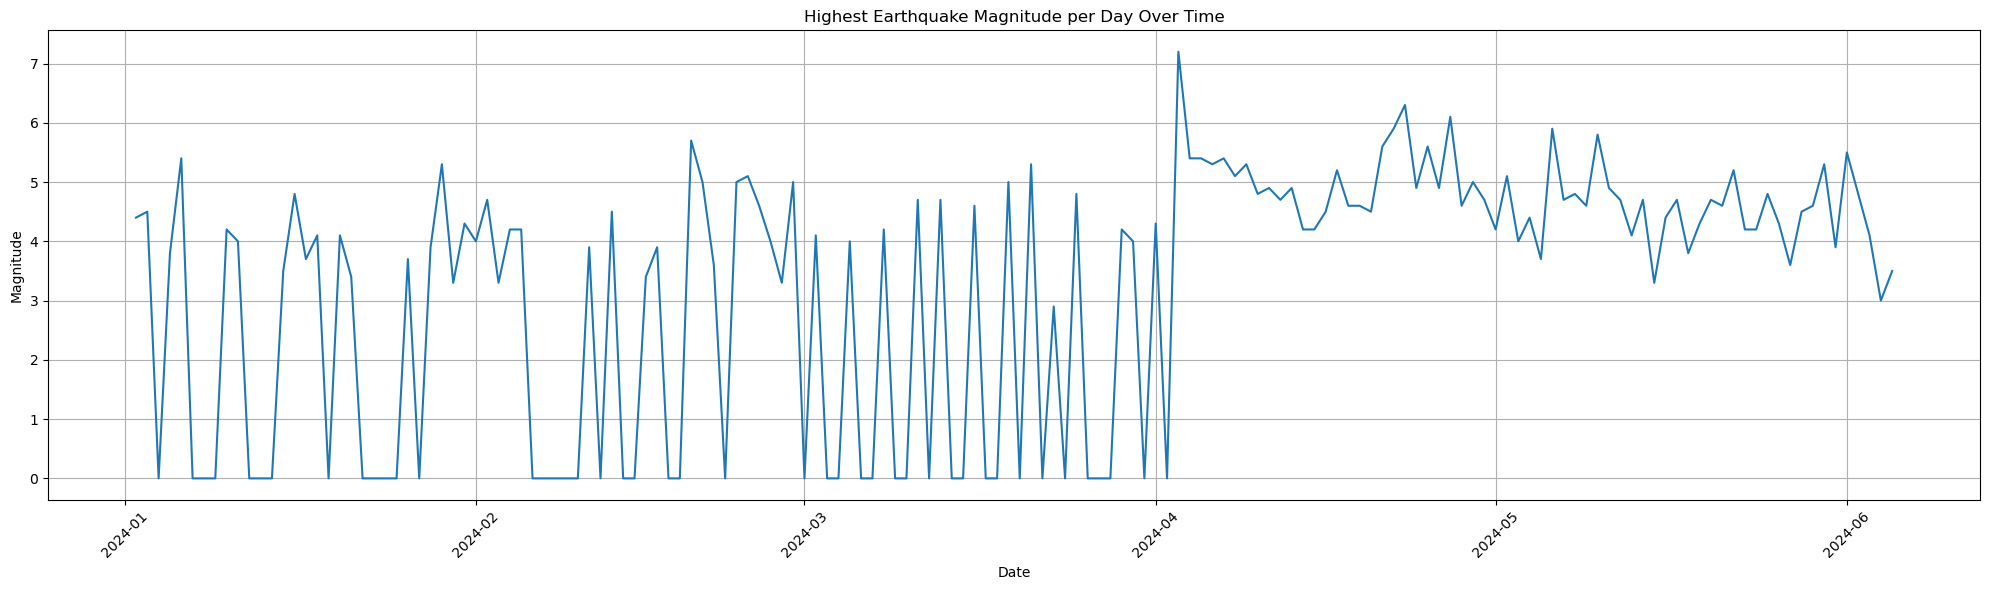

In [46]:
# Plotting using Matplotlib
plt.figure(figsize=(20, 6))
plt.plot(max_magnitude_per_day['index'], max_magnitude_per_day['Magnitude'], '-', markersize=5)
plt.title('Highest Earthquake Magnitude per Day Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# find date

In [19]:
start_year = 2024
start_month = 2
start_day = 26

end_year = 2025
end_month = 5
end_day = 15

for query_year in range(start_year, end_year+1):
    start_month_loop=1
    end_month_loop=12
    if(query_year == start_year):
        start_month_loop = start_month
    # last year
    if((query_year+1) == (end_year+1)):
        end_month_loop = end_month
    
    for query_month in range(start_month_loop,end_month_loop+1):
        print("Year: ", query_year, " Month: ", query_month)

Year:  2024  Month:  2
Year:  2024  Month:  3
Year:  2024  Month:  4
Year:  2024  Month:  5
Year:  2024  Month:  6
Year:  2024  Month:  7
Year:  2024  Month:  8
Year:  2024  Month:  9
Year:  2024  Month:  10
Year:  2024  Month:  11
Year:  2024  Month:  12
Year:  2025  Month:  1
Year:  2025  Month:  2
Year:  2025  Month:  3
Year:  2025  Month:  4
Year:  2025  Month:  5
